# Лабораторная работа 6.

# Cегментация изображений

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import sys
sys.path.append('../')
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
import matplotlib.pyplot as plt
from utility import segmentation_utils


### Загрузим изображение

In [3]:
image = cv.imread('../images/lab5.jpg')
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

[88 83 79]
800


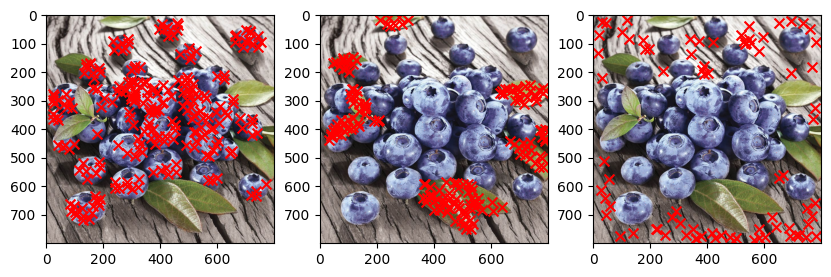

In [107]:
img_points_berry_seed = cv.imread('../images/points_berry.bmp')
img_points_berry_seed= cv.cvtColor(img_points_berry_seed, cv.COLOR_BGR2RGB)

img_points_green_seed = cv.imread('../images/points_green.bmp')
img_points_green_seed= cv.cvtColor(img_points_green_seed, cv.COLOR_BGR2RGB)

img_points_wood_seed = cv.imread('../images/points_wood.bmp')
img_points_wood_seed= cv.cvtColor(img_points_wood_seed, cv.COLOR_BGR2RGB)

find_seed=[]
print(img_points_berry_seed[1,1])
print(img_points_berry_seed.shape[0])
seeeds=[]
x_find=[]
y_find=[]
point_arr=[img_points_berry_seed,img_points_green_seed,img_points_wood_seed]
kek=[]
for k in range(0,3):
    for i in range(0,point_arr[k].shape[0]):
        for j in range(0,point_arr[k].shape[1]):
            if (point_arr[k][i,j][0]==255)and(point_arr[k][i,j][1]==0)and(point_arr[k][i,j][2]==0):
                find_seed.append((i,j))
    x_find.append(list(map(lambda x: x[1], find_seed)))
    y_find.append(list(map(lambda x: x[0], find_seed)))
    seeeds.append(find_seed)
    find_seed=[]
        
#print(find_seed)   
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.scatter(x_find[0], y_find[0], marker="x", color="red", s=50)
plt.imshow(img_points_berry_seed)
plt.subplot(1, 3, 2)
plt.scatter(x_find[1], y_find[1], marker="x", color="red", s=50)
plt.imshow(img_points_berry_seed)
plt.subplot(1, 3, 3)
plt.scatter(x_find[2], y_find[2], marker="x", color="red", s=50)
plt.imshow(img_points_berry_seed)

plt.show();

СТОЛ

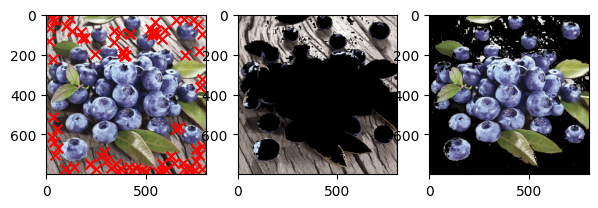

In [76]:
# определяем координаты начальных точек
#seeds_wood = [(100, 50), (100,60),(90,510)]
seeds_wood = seeeds[2]
# координаты для графика
x = list(map(lambda x: x[1], seeds_wood))
y = list(map(lambda x: x[0], seeds_wood))
# порог похожести цвета региона
threshold_wood = 100
# находим сегментацию используя метод из segmentation_utils
mask_segmented_region_wood = segmentation_utils.region_growingHSV(image_hsv, seeds_wood, threshold_wood)
# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result_wood = cv.bitwise_and(image, image, mask=mask_segmented_region_wood)

reverse_mask_wood = np.zeros(mask_segmented_region_wood.shape[0:2], dtype=np.uint8)
#print(mask_segmented_region2.shape[0])
for i in range(0,mask_segmented_region_wood.shape[0]):
    for j in range(0,mask_segmented_region_wood.shape[1]):
        if mask_segmented_region_wood[i,j]==0:
            reverse_mask_wood[i,j]=255
        else:
            reverse_mask_wood[i,j]=0
            
reverse_result_wood=cv.bitwise_and(image, image, mask=reverse_mask_wood)
# отображаем полученное изображение
plt.figure(figsize=(7,7))
plt.subplot(1, 3, 1)
plt.scatter(x, y, marker="x", color="red", s=50)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_wood, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(reverse_result_wood, cv.COLOR_BGR2RGB))
plt.show()

ЛИСТЬЯ

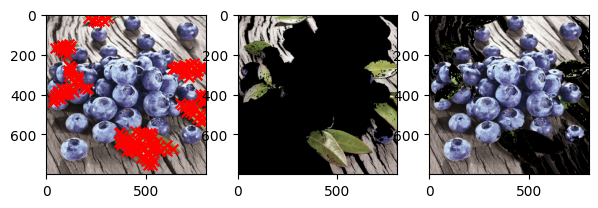

In [77]:
# определяем координаты начальных точек
#seeds_green = [(100, 50), (100,60),(90,510)]
seeds_green = seeeds[1]
# координаты для графика
x = list(map(lambda x: x[1], seeds_green))
y = list(map(lambda x: x[0], seeds_green))
# порог похожести цвета региона
threshold_green = 120
# находим сегментацию используя метод из segmentation_utils
mask_segmented_region_green = segmentation_utils.region_growingHSV(image_hsv, seeds_green, threshold_green)
# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result_green = cv.bitwise_and(image, image, mask=mask_segmented_region_green)

reverse_mask_green = np.zeros(mask_segmented_region_green.shape[0:2], dtype=np.uint8)
#print(mask_segmented_region2.shape[0])
for i in range(0,mask_segmented_region_green.shape[0]):
    for j in range(0,mask_segmented_region_green.shape[1]):
        if mask_segmented_region_green[i,j]==0:
            reverse_mask_green[i,j]=255
        else:
            reverse_mask_green[i,j]=0
            
reverse_result_green=cv.bitwise_and(image, image, mask=reverse_mask_green)
# отображаем полученное изображение
plt.figure(figsize=(7,7))
plt.subplot(1, 3, 1)
plt.scatter(x, y, marker="x", color="red", s=50)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_green, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(reverse_result_green, cv.COLOR_BGR2RGB))
plt.show()

СЛОЖЕНИЕ МАСОК

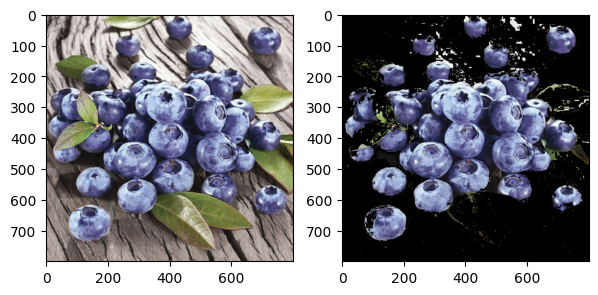

In [102]:
# определяем координаты начальных точек
green_wood_mask = np.zeros(image.shape[0:2], dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (reverse_mask_green[i,j]==0)or(reverse_mask_wood[i,j]==0):
            green_wood_mask[i,j]=0
        else:
            green_wood_mask[i,j]=255

# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
sum_result = cv.bitwise_and(image, image, mask=green_wood_mask)
# отображаем полученное изображение
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(sum_result, cv.COLOR_BGR2RGB))
plt.show()

ЯГОДЫ

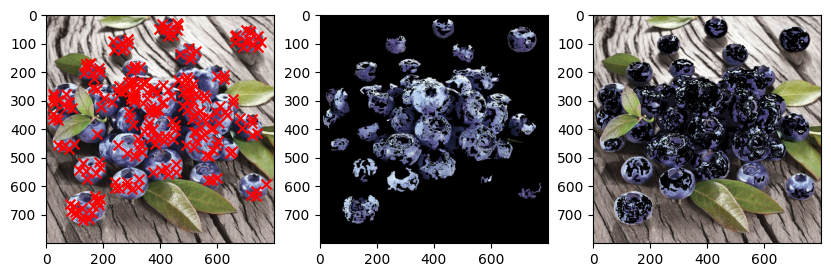

In [110]:
# определяем координаты начальных точек
#seeds_berry = [(100, 50), (100,60),(90,510)]
seeds_berry = seeeds[0]

# координаты для графика
x = list(map(lambda x: x[1], seeds_berry))
y = list(map(lambda x: x[0], seeds_berry))
# порог похожести цвета региона
threshold_berry = 100
# находим сегментацию используя метод из segmentation_utils
mask_segmented_region_berry = segmentation_utils.region_growingHSV(image_hsv, seeds_berry, threshold_berry)
# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result_berry = cv.bitwise_and(image, image, mask=mask_segmented_region_berry)

reverse_mask_berry = np.zeros(mask_segmented_region_berry.shape[0:2], dtype=np.uint8)
#print(mask_segmented_region2.shape[0])
for i in range(0,mask_segmented_region_berry.shape[0]):
    for j in range(0,mask_segmented_region_berry.shape[1]):
        if mask_segmented_region_berry[i,j]==0:
            reverse_mask_berry[i,j]=255
        else:
            reverse_mask_berry[i,j]=0
            
reverse_result_berry=cv.bitwise_and(image, image, mask=reverse_mask_berry)
# отображаем полученное изображение
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.scatter(x, y, marker="x", color="red", s=50)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_berry, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(reverse_result_berry, cv.COLOR_BGR2RGB))
plt.show()

ДОБАВЛЯЮ МАСКУ ЯГОД К ОБЩЕЙ МАСКЕ ЛИСТЬЕВ И СТОЛА

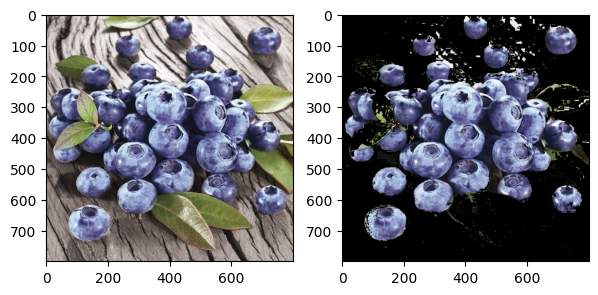

In [111]:
# определяем координаты начальных точек
mask = np.zeros(image.shape[0:2], dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (green_wood_mask[i,j]==0) and (mask_segmented_region_berry[i,j]==0):
            mask[i,j]=0
        else:
            mask[i,j]=255

# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result = cv.bitwise_and(image, image, mask=mask)
# отображаем полученное изображение
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

.
.
.
.
ИСХОДНИК

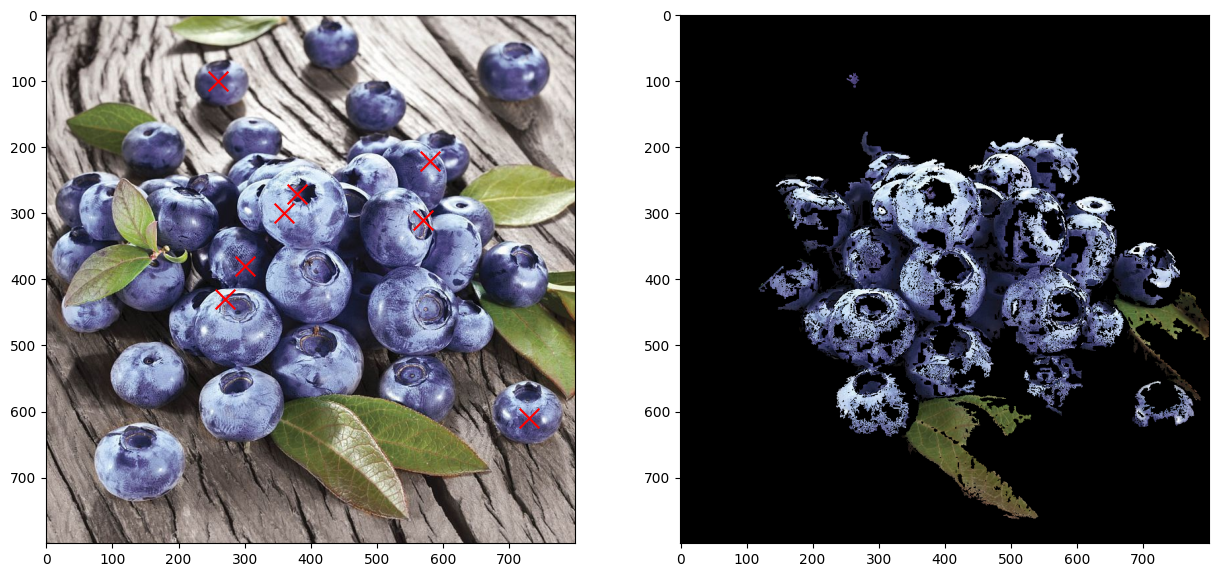

In [91]:
# определяем координаты начальных точек
image1=image
seeds = [(300, 360),(270, 380),(310,570), (380, 300), (100, 260),(220,580),(610,730),(430,270)]
# координаты для графика
x = list(map(lambda x: x[1], seeds))
y = list(map(lambda x: x[0], seeds))
# порог похожести цвета региона
threshold = 100
# находим сегментацию используя метод из segmentation_utils
mask_segmented_region = segmentation_utils.region_growingHSV(image_hsv, seeds, threshold)
# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result = cv.bitwise_and(image1, image1, mask=mask_segmented_region)
# отображаем полученное изображение
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.scatter(x, y, marker="x", color="red", s=200)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()